We have compiled a list of seg_ids for each layer that are anomalous. 
From this, we can look more closely at the attributes to see if there exists a pattern/relationship between the nodes being anomalous and excitatory. 
Is there a statistically significant difference between the anomalous nodes and the normal nodes with regards to the nodes being excitatory. 

Let e1 represent the proportion of excitatory neurons in the anomalous group and let e2 represent the proportion of excitatory neurons in the normal group. For there to exist a statistically significant difference in the proportion of e neurons in the anomalous group, |e1 - e2| >> 0.

Null Hypothesis: |e1 - e2| == 0. 

Alternate Hypothesis: |e1 - e2 | >> 0

Process:
1. We consider 6 samples: one from each cortical layer subgraph
2. Apply a T-distribution with 5 degrees of freedom given the lower sample size for this problem
3. Compute the p-value


In [1]:
# import relevant libraries
import scipy
import pandas as pd
import numpy as np

In [2]:
# First step is to collect all the data: we read in the node table and a list of anomalies from each layer
# for Hypothesis Testing, we will treat each layer as sample data point

nodes = pd.read_csv('FINAL_node2vec_results/final_connectome_node_table.csv')
L1_Anomalies = pd.read_csv('overlaps_L1.csv')['pt_root_id'].to_numpy()
L23_Anomalies = pd.read_csv('overlaps_L23.csv')['pt_root_id'].to_numpy()
L4_Anomalies = pd.read_csv('overlaps_L4.csv')['pt_root_id'].to_numpy()
L5_Anomalies = pd.read_csv('overlaps_L5.csv')['pt_root_id'].to_numpy()
L6_Anomalies = pd.read_csv('overlaps_L6.csv')['pt_root_id'].to_numpy()
WM_Anomalies = pd.read_csv('overlaps_WM.csv')['pt_root_id'].to_numpy()

In [3]:
L1_filtered = nodes[nodes['pt_root_id'].isin(L1_Anomalies)]
L23_filtered = nodes[nodes['pt_root_id'].isin(L23_Anomalies)]
L4_filtered = nodes[nodes['pt_root_id'].isin(L4_Anomalies)]
L5_filtered = nodes[nodes['pt_root_id'].isin(L5_Anomalies)]
L6_filtered = nodes[nodes['pt_root_id'].isin(L6_Anomalies)]
WM_filtered = nodes[nodes['pt_root_id'].isin(WM_Anomalies)]

In [4]:
# compue the absolute value difference between proportion of excitatory neurons in the anomalous df and proportion of excitatory neurons in the normal df

def sample_generation (anomalies_df, layer):
    '''
    Generate samples for Hypothesis Testing from final data
    Parameters:
        anomalies_df: dataframe of all the anomalies extract in a subgraph layer
        layer: cortical layer [L1, L23, L4, L5, L6, WM]
    Returns:
        sample_val: (float) proportion of excitatory nodes in the anomalous data / proportion of e nodes in the normal data

    '''
    num_of_e = len(anomalies_df.loc[anomalies_df['cell_polarity'] == 'excitatory'])
    total_count = len(anomalies_df)
    e_in_a = num_of_e / total_count

    filtered_layer = nodes.loc[nodes['layer'] == layer]
    total_count_n = len(filtered_layer)
    e_in_n = len(filtered_layer.loc[filtered_layer['cell_polarity'] == 'excitatory'])/total_count_n

    sample_val = abs(e_in_a - e_in_n)

    return sample_val

In [5]:
x1 = sample_generation(L1_filtered, 'L1')
x2 = sample_generation(L23_filtered, 'L23')
x3 = sample_generation(L4_filtered, 'L4')
x4 = sample_generation(L5_filtered, 'L5')
x5 = sample_generation(L6_filtered, 'L6')
x6 = sample_generation(WM_filtered, 'WM')

In [6]:
list_of_samples = np.array([x1, x2, x3, x4, x5, x6])
sample_mean = np.mean(list_of_samples)
sample_std = np.std(list_of_samples)
print(sample_mean, sample_std)

0.07791197369729402 0.11650176952739909


We have compiled a sample mean, sample std, and a null hypothesis. We can now apply the T-distribution for this problem given a low sample size

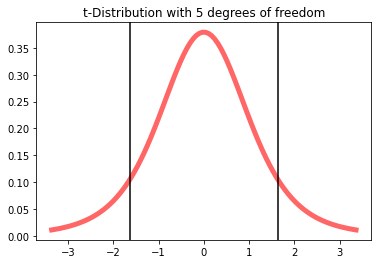

In [7]:
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df = 5
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
plt.title('t-Distribution with 5 degrees of freedom')

t_Value = sample_mean / (sample_std / np.sqrt(6))
plt.axvline(x = t_Value, color = 'k', label = 'axvline - full height')
plt.axvline(x = - t_Value, color = 'k', label = 'axvline - full height')

In [8]:
# COMPUTE p- value with confidence level of 0.05
t_Value = sample_mean / (sample_std / np.sqrt(6))
p_val = scipy.stats.t.sf(t_Value, df=5) * 2

In [9]:
p_val

0.16232125592297336

Given that the p value is greater than the chosen confidence level of 95% (alpha = 0.05), we fail to adequately reject the null hypothesis and cannot determine that there exists a significant difference between the anomalous and normal group of nodes.